100%|██████████| 600/600 [05:05<00:00,  1.94it/s]

tensor(-703.8319)
tensor(-703.8319)


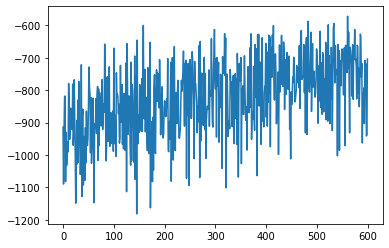

In [1]:
from seagul.rl.models import PpoModel

import torch.nn as nn
from seagul.rl.algos.ppo import ppo
from seagul.nn import MLP, CategoricalMLP
import torch
import gym

import matplotlib.pyplot as plt
%matplotlib inline
import seagul.envs

torch.set_default_dtype(torch.double)
env_name= "Pendulum-v0"

input_size = 3
output_size = 1
layer_size = 12
num_layers = 2
activation = nn.ReLU

policy = MLP(input_size, output_size, num_layers, layer_size, activation)
value_fn = MLP(input_size, 1, num_layers, layer_size, activation)
model = PpoModel(policy, value_fn, action_var=.7, discrete=False)

# env2, t_policy, t_val, rewards = ppo('InvertedPendulum-v2', 100, policy, value_fn)
t_model, rewards, var_dict = ppo(env_name, 
                                600, 
                                model, 
                                action_var_schedule = [.7],
                                epoch_batch_size=512,
                                env_timesteps=150,
                                gamma=0.99,
                                lam=0.99,
                                eps=0.2,
                                seed=0,
                                policy_batch_size=512,
                                value_batch_size=512,
                                policy_lr=1e-4,
                                value_lr=1e-3,
                                p_epochs=10,
                                v_epochs=10,
                                use_gpu=False,
                                reward_stop=None)
print(rewards[-1])
plt.plot(rewards)

# pulls all of locals into 
locals().update(var_dict)

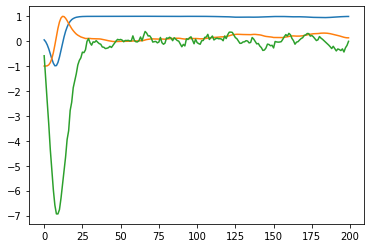

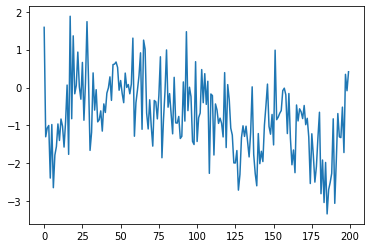

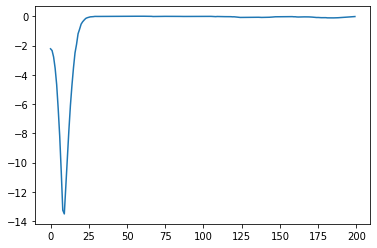

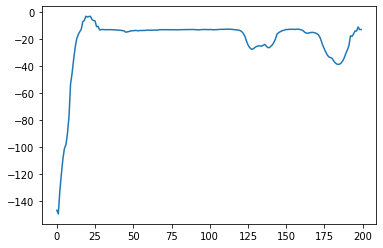

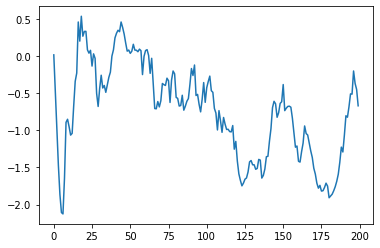

In [8]:
env = gym.make(env_name)

done = False
obs = env.reset()

obs_list = []
act_list = []
rew_list = []
avg_list = []
val_list = []

while not done:
    act, val, _ ,_ = model.step(obs)
    obs,rew,done,_ = env.step(act.reshape(-1))
    avg = model.policy(torch.as_tensor(obs))
    
    obs_list.append(obs)
    act_list.append(act)
    rew_list.append(rew)
    avg_list.append(avg)
    val_list.append(val)
    
plt.plot(obs_list)
plt.figure()
plt.plot(act_list)
plt.figure()
plt.plot(rew_list)
plt.figure()
plt.plot(val_list)
plt.figure()
plt.plot(avg_list)
    

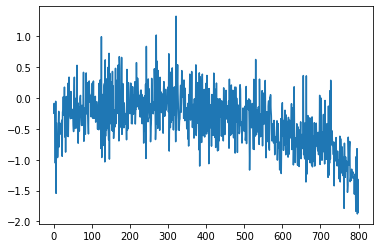

In [9]:
plt.plot(p_loss_hist)

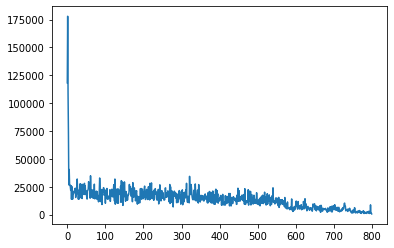

In [10]:
plt.plot(v_loss_hist)

tensor([[-0.2771],
        [-0.1761],
        [ 0.2044],
        [-0.2904],
        [ 0.2393],
        [ 0.1995],
        [-0.3802],
        [ 0.2611],
        [-0.0807],
        [ 0.1831],
        [-0.0456],
        [-0.2770],
        [-0.2376],
        [ 0.2483],
        [-0.2651],
        [-0.2812],
        [-0.4157],
        [-0.1721],
        [-0.0799],
        [ 0.2678],
        [ 0.1749],
        [-0.3512],
        [ 0.0840],
        [ 0.2557],
        [-0.3298],
        [-0.3360],
        [ 0.1450],
        [-0.3858],
        [ 0.0137],
        [-0.2809],
        [-0.3160],
        [-0.2706],
        [-0.1999],
        [-0.2210],
        [ 0.1554],
        [ 0.2057],
        [-0.3150],
        [-0.2587],
        [-0.3934],
        [-0.2940],
        [-0.2726],
        [-0.3415],
        [ 0.2247],
        [ 0.2713],
        [-0.1050],
        [ 0.2342],
        [ 0.0138],
        [ 0.2522],
        [ 0.2611],
        [ 0.1631],
        [ 0.2380],
        [ 0.2645],
        [ 0.